# Forest Cover Type Prediciton
**Life cycle of Machine learning Project**

* Understanding the Problem Statement
* Data Collection
* Data Cleaning
* Exploratory data analysis
* Data Pre-Processing
* Model Training 
* Choose best model

## 1) Understanding the Problem Statement

- The data is from 4 wilderness areas located in the Roosevelt National Forest of northern Colorado.
- The wilderness areas are:
    - 1 - Rawah Wilderness Area
    - 2 - Neota Wilderness Area
    - 3 - Comanche Peak Wilderness Area
    - 4 - Cache la Poudre Wilderness Area
- The observation are taken from 30m x 30m patches of forest that are classified as one of seven cover types
    - 1 - Spruce/Fir
    - 2 - Lodgepole Pine
    - 3 - Ponderosa Pine
    - 4 - Cottonwood/Willow
    - 5 - Aspen
    - 6 - Douglas-fir
    - 7 - Krummholz

## 2) Data Collection.
* The Dataset is collected from UCI Repository -  https://archive.ics.uci.edu/ml/datasets/covertype
* The data consists of 54 columns and 581012 rows.

###  Import Data and Required Packages
**Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.**      

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# Supress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

**Import the CSV Data as Pandas DataFrame**

In [10]:
df = pd.read_csv("D:\Forest Cover Type Nov 2024\Forest-Cover-Type-Prediction\Data\covtype.csv")

**Show Top 5 Records**

In [11]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


#### Features Description

1. **Elevation** quantitative meters Elevation in meters
2. **Aspect** quantitative azimuth Aspect in degrees azimuth
3. **Slope** quantitative degrees Slope in degrees
4. **Horizontal_Distance_To_Hydrology** quantitative meters Horz Dist to nearest surface water features
5. **Vertical_Distance_To_Hydrology** quantitative meters Vert Dist to nearest surface water features
6. **Horizontal_Distance_To_Roadways** quantitative meters Horz Dist to nearest roadway
7. **Hillshade_9am** quantitative 0 to 255 index Hillshade index at 9am, summer solstice
8. **Hillshade_Noon** quantitative 0 to 255 index Hillshade index at noon, summer soltice
9. **Hillshade_3pm** quantitative 0 to 255 index Hillshade index at 3pm, summer solstice
10. **Horizontal_Distance_To_Fire_Points** quantitative meters Horz Dist to nearest wildfire ignition points
11. **Wilderness_Area** (4 binary columns) qualitative 0 (absence) or 1 (presence) Wilderness area designation
12. **Soil_Type** (40 binary columns) qualitative 0 (absence) or 1 (presence) Soil Type designation
13. **Cover_Type** (7 types) integer 1 to 7 Forest Cover Type designation

**Shape of the dataset**

In [12]:
df.shape

(581012, 55)

**Duplicate rows in the dataset**

In [13]:
duplicate = df[df.duplicated()]
# Print the resultant Dataframe
duplicate

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type


#### Remove unnecessary columns

In [14]:
df1 = df.copy()
#Remove unnecessary columns
remove_columns = []

#std = 0 are constant columns, they don't help in prediction process
for col in df1.columns:
    if df1[col].std() <= 0.02: #standard deviation is zero
        remove_columns.append(col)

#drop the columns        
df1.drop(remove_columns,axis=1,inplace=True)

print(remove_columns)
#Following columns are dropped

['Soil_Type7', 'Soil_Type8', 'Soil_Type15', 'Soil_Type36']


#### Display summary statistics for a dataframe

In [15]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


#### Statistical Inferences

- Soil type 7,15,8 and 36 are constant(each value is zero), so they can be removed.
- Wilderness_Area and Soil_Type are one hot encoded. Hence, they could be converted back for some analysis.
- Scales are not the same for all. Hence, rescaling and standardisation may be necessary for some algorithms.

**Check Datatypes in the dataset**

In [16]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

#### Inference
- Count is 581012 for each column, so no data point is missing.

#### Restoring original values for better analysis.
##### The target variable of our data i.e Cover_Type is one hot encoded.
##### As our data is already preprocessed but we will  replace the  values back to their original values for better analysis and data visualization.

In [17]:
df1['Cover_Type'].replace({1:'Spruce/Fir', 2:'Lodgepole Pine', 3:'Ponderosa Pine', 4:'Cottonwood/Willow', 5:'Aspen', 6:'Douglas-fir', 7:'Krummholz'}, inplace=True)

In [18]:
df1 = df1.rename(columns={"Wilderness_Area1":"Rawah_WA","Wilderness_Area2":"Neota_WA",
"Wilderness_Area3":"Comanche_Peak_WA","Wilderness_Area4":"Cache_la_Poudre_WA","Horizontal_Distance_To_Hydrology":"HD_Hydrology",
"Vertical_Distance_To_Hydrology":"VD_Hydrology","Horizontal_Distance_To_Roadways":"HD_Roadways",
                               "Horizontal_Distance_To_Fire_Points":"HD_Fire_Points"})

In [19]:
df2 = df1.copy()
df2['Wild Areas'] = (df2.iloc[:,10:15] == 1).idxmax(1)
df2['Soil types'] = (df2.iloc[:,15:55] == 1).idxmax(1)
df2['Wild Areas'].unique()

array(['Rawah_WA', 'Comanche_Peak_WA', 'Cache_la_Poudre_WA', 'Neota_WA'],
      dtype=object)

#### Drop the columns which are not required now

In [20]:
df2 = df2.drop(columns=['Rawah_WA', 'Neota_WA', 'Comanche_Peak_WA',
       'Cache_la_Poudre_WA', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40'])

In [21]:
df=df2

**Show Top 5 Records**

In [22]:
df.head()

,Elevation,Aspect,Slope,HD_Hydrology,VD_Hydrology,HD_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,HD_Fire_Points,Cover_Type,Wild Areas,Soil types
0,2596,51,3,258,0,510,221,232,148,6279,Aspen,Rawah_WA,Soil_Type29
1,2590,56,2,212,-6,390,220,235,151,6225,Aspen,Rawah_WA,Soil_Type29
2,2804,139,9,268,65,3180,234,238,135,6121,Lodgepole Pine,Rawah_WA,Soil_Type12
3,2785,155,18,242,118,3090,238,238,122,6211,Lodgepole Pine,Rawah_WA,Soil_Type30
4,2595,45,2,153,-1,391,220,234,150,6172,Aspen,Rawah_WA,Soil_Type29


**Shape of the dataset**

In [23]:
df.shape

(581012, 13)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Elevation       581012 non-null  int64 
 1   Aspect          581012 non-null  int64 
 2   Slope           581012 non-null  int64 
 3   HD_Hydrology    581012 non-null  int64 
 4   VD_Hydrology    581012 non-null  int64 
 5   HD_Roadways     581012 non-null  int64 
 6   Hillshade_9am   581012 non-null  int64 
 7   Hillshade_Noon  581012 non-null  int64 
 8   Hillshade_3pm   581012 non-null  int64 
 9   HD_Fire_Points  581012 non-null  int64 
 10  Cover_Type      581012 non-null  object
 11  Wild Areas      581012 non-null  object
 12  Soil types      581012 non-null  object
dtypes: int64(10), object(3)
memory usage: 57.6+ MB


## 3. EXPLORING DATA

In [25]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 10 numerical features : ['Elevation', 'Aspect', 'Slope', 'HD_Hydrology', 'VD_Hydrology', 'HD_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'HD_Fire_Points']

We have 3 categorical features : ['Cover_Type', 'Wild Areas', 'Soil types']


### Univariate Analysis
* The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

### Numerical Features

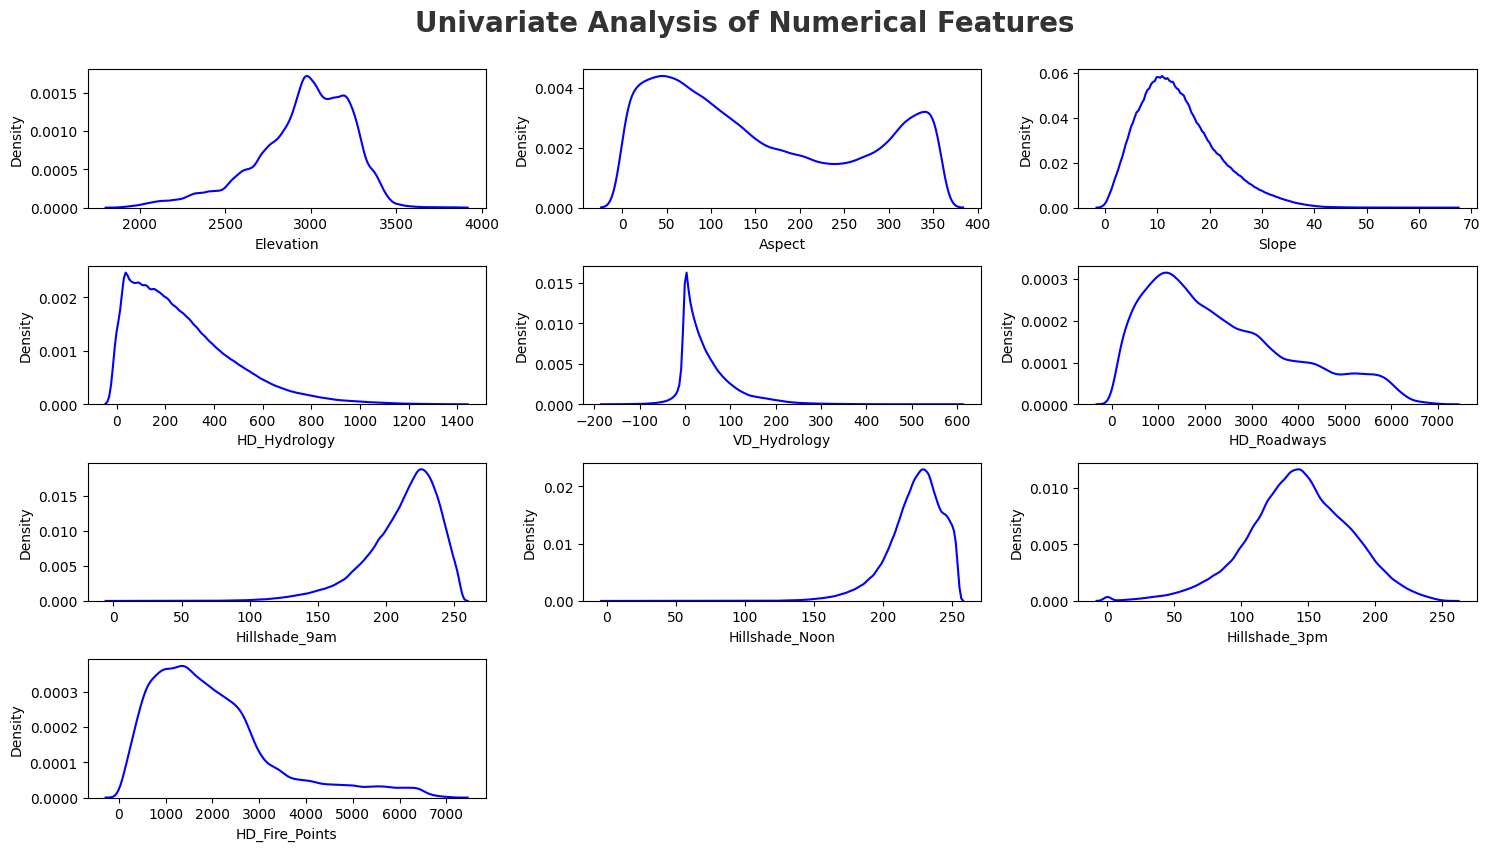

In [26]:
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]], color='blue')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

### Categorical Features

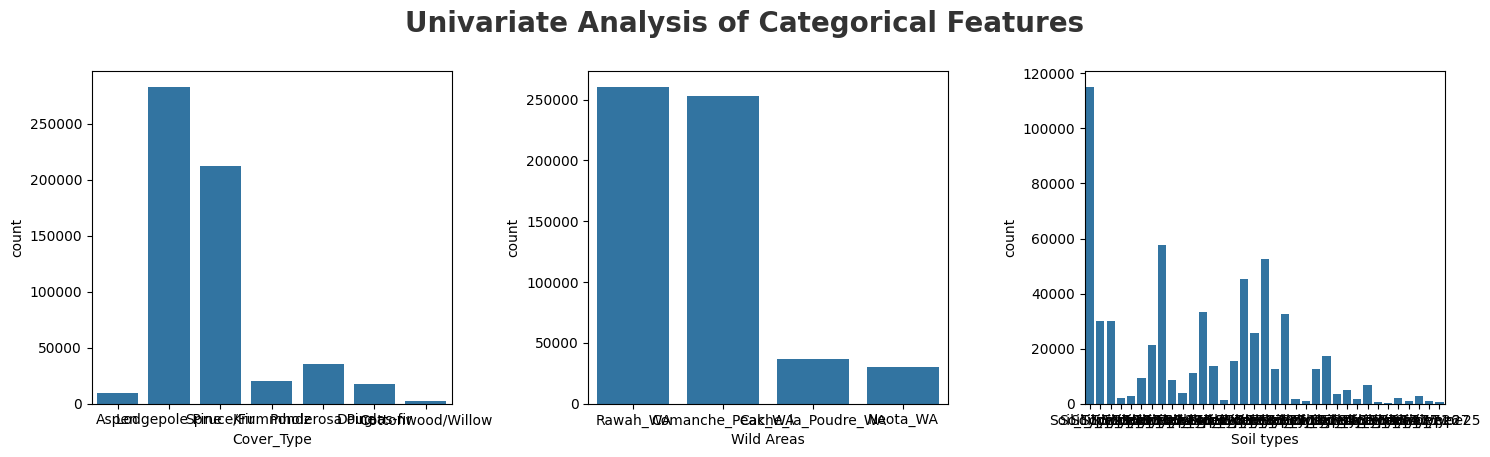

In [27]:
# categorical columns
plt.figure(figsize=(15, 8))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(categorical_features)):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.tight_layout()

### Multivariate Analysis
* Multivariate analysis is the analysis of more than one variable.

In [28]:
discrete_features=[feature for feature in numeric_features if (len(df[feature].unique())<=25 and len(df[feature].unique())>3)]

continuous_features=[feature for feature in numeric_features if len(df[feature].unique()) > 25]

encoded_categorical = [feature for feature in numeric_features if len(df[feature].unique()) <=3]

print('We have {} discrete features : {}'.format(len(discrete_features), discrete_features))
print('\nWe have {} continuous_features : {}'.format(len(continuous_features), continuous_features))
print('\nWe have {} encoded_categorical : {}'.format(len(encoded_categorical), encoded_categorical))

We have 0 discrete features : []

We have 10 continuous_features : ['Elevation', 'Aspect', 'Slope', 'HD_Hydrology', 'VD_Hydrology', 'HD_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'HD_Fire_Points']

We have 0 encoded_categorical : []


### Check Multicollinearity in Numerical features

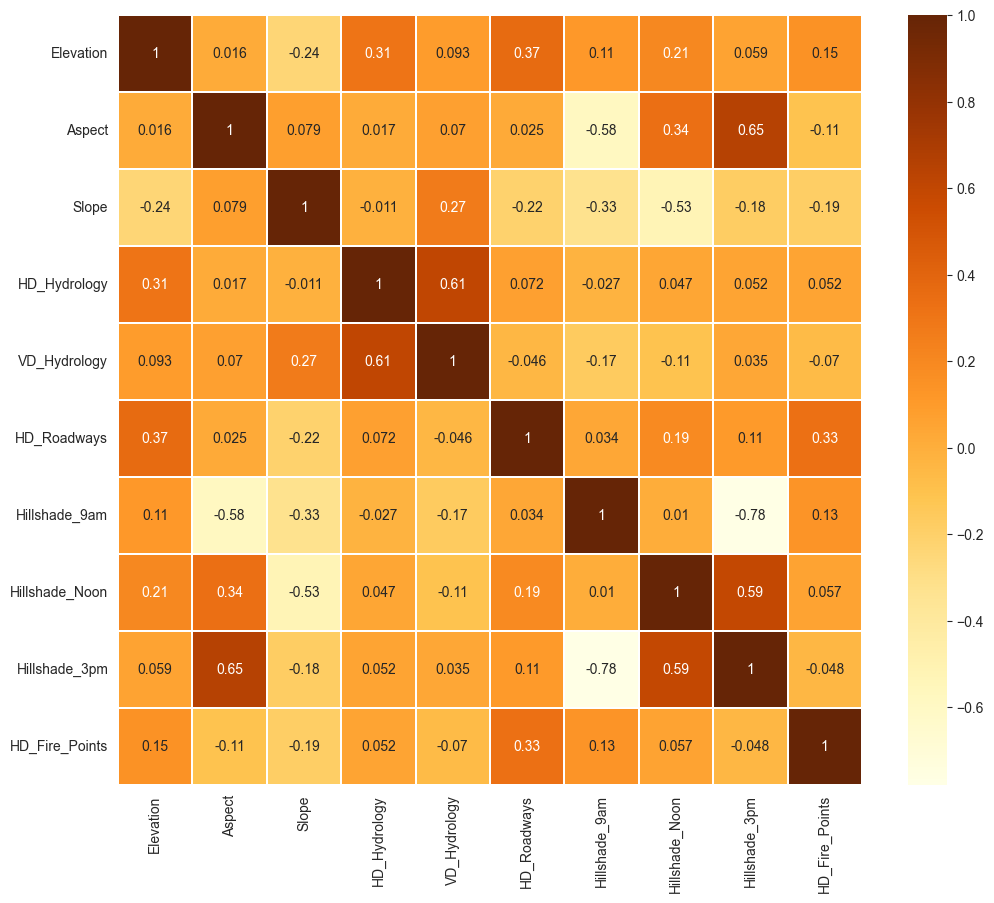

In [42]:
numeric_df = df.select_dtypes(include=['number'])

# Plot the heatmap
fig = plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), annot=True, linewidths=.3, cmap='YlOrBr')
plt.show()

#### Inferences (Correlated Features)
- Aspect and Hillshade at 9am
- Aspect and Hillshade at 3pm
- Slope and Hillshade at Noon
- Horizontal Distance to hydrology and Vertical Distance to Hydrology
- Hillshade at 9am and Hillshade at 3pm
- Hillshade at 3pm and Hillshade at Noon

### Check Multicollinearity for Categorical features

* **A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test**

* **A chi-square statistic is one way to show a relationship between two categorical variables.**

* **Here we test correlation of Categorical columns with Target column i.e CoverType**

**Null Hypothesis ($ H_0 $)**: The Feature is independent of target column (No-Correlation)

**Alternative Hypothesis ($ H_1 $)**: The Feature and Target column are not independent (Correlated)

In [30]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df['Cover_Type'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[categorical_features, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,Cover_Type,Reject Null Hypothesis
1,Wild Areas,Reject Null Hypothesis
2,Soil types,Reject Null Hypothesis


### Checking Null Values

In [31]:
df.isnull().sum()

Elevation         0
Aspect            0
Slope             0
HD_Hydrology      0
VD_Hydrology      0
HD_Roadways       0
Hillshade_9am     0
Hillshade_Noon    0
Hillshade_3pm     0
HD_Fire_Points    0
Cover_Type        0
Wild Areas        0
Soil types        0
dtype: int64

#### How is the data distribution of our target column 'Cover_Type' ?

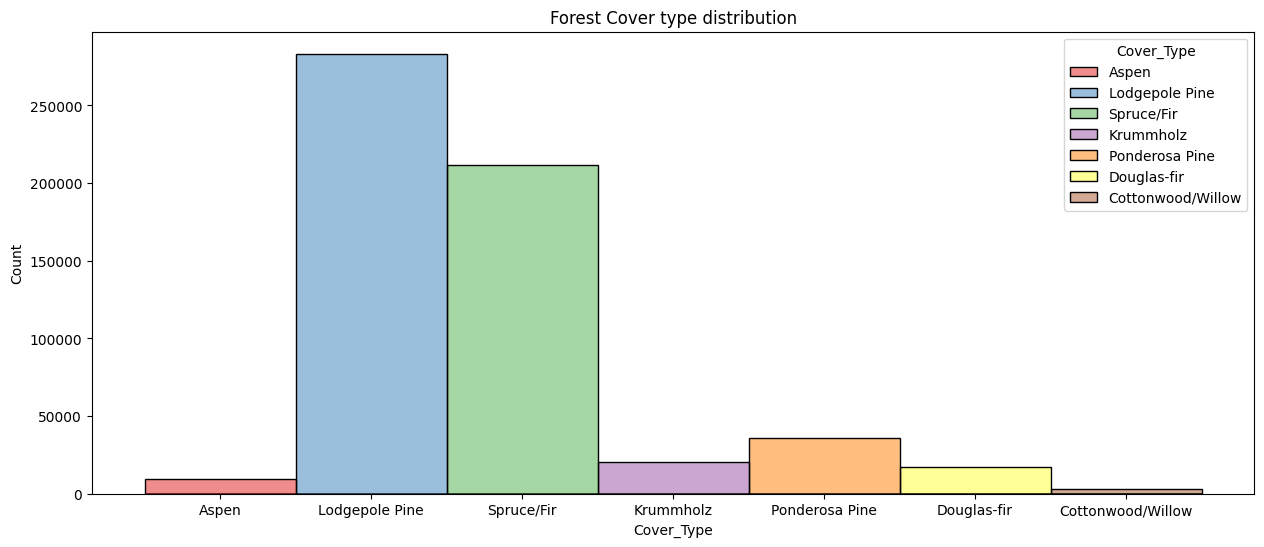

In [32]:
plt.figure(figsize=(15,6))
sns.histplot(data=df, x="Cover_Type", hue = 'Cover_Type', palette='Set1')
plt.title('Forest Cover type distribution')
plt.show()

#### INFERENCE
- we can see 'Lodgepole Pine' has largest forest cover.
- 'Cottonwood/Willow' has lowest forest cover.

#### Which Wild area has what kind of Forest cover ?

<Axes: xlabel='Wild Areas'>

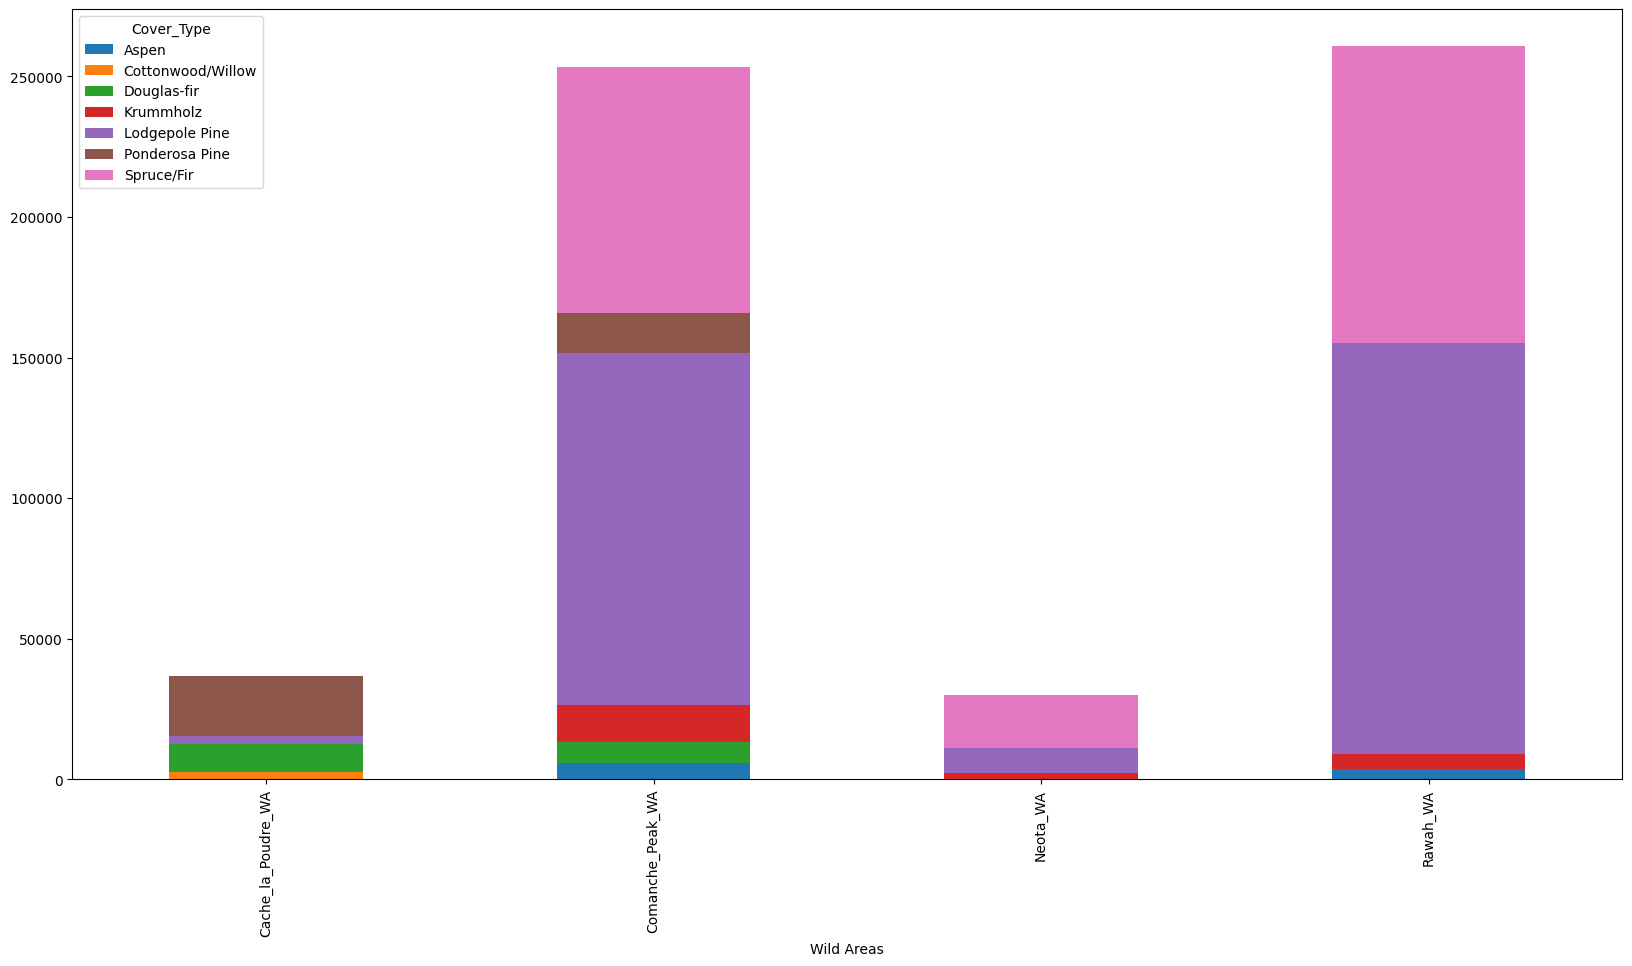

In [33]:
wild_area_cover_type=df.groupby(['Wild Areas'])['Cover_Type'].value_counts().unstack()
wild_area_cover_type.plot(kind='bar', stacked=True,figsize=(20,10))

#### INFERENCES
- Cache_La_Poudre and Neota Wilderness Areas have same number of forest covers
- Comanche_Peak accounts for 42% of the total Wild Areas data.
- The least data is for Neota Wild Area i.e 3.3% in our data.
- We can also see that none of the wild areas have all the types of forest covers

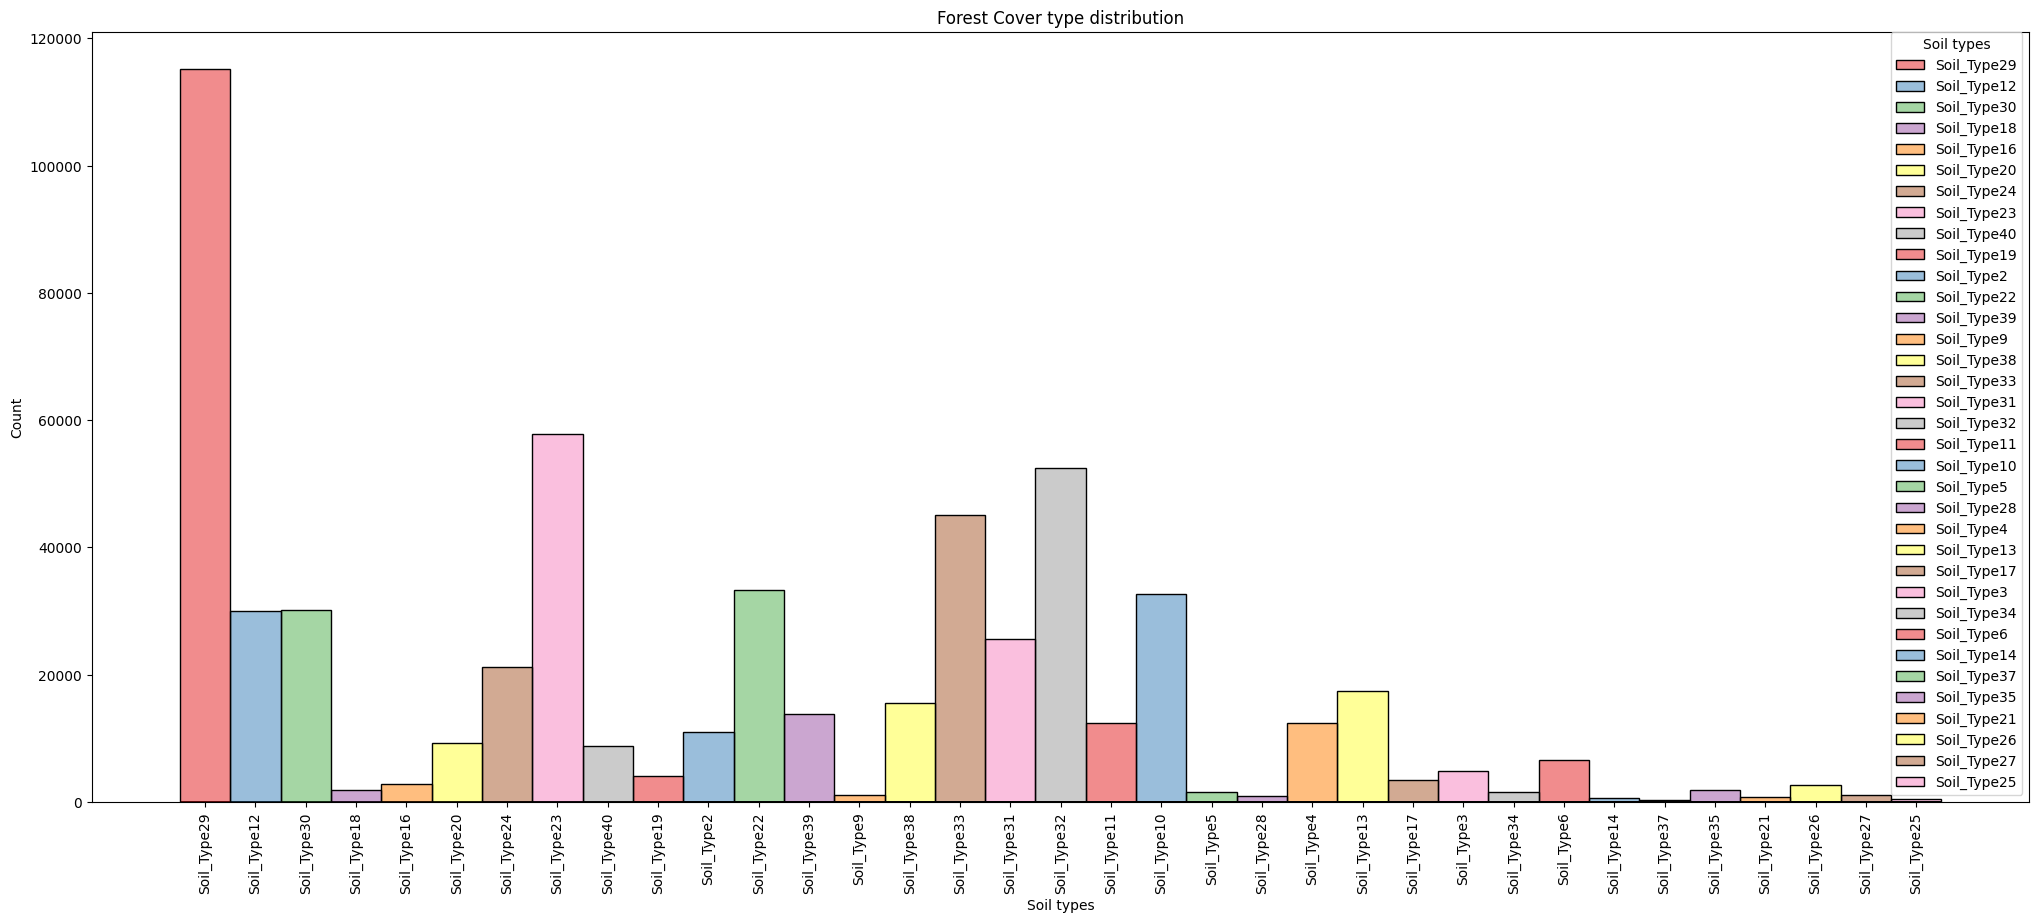

In [34]:
plt.figure(figsize=(25,10))
sns.histplot(data=df, x="Soil types", hue = 'Soil types', palette='Set1')
plt.title('Forest Cover type distribution')
plt.xticks(rotation=90)
plt.show()


#### INFERENCE
- We have most of the data for soil type 29 and 23.
- Many soil types are rare in our data

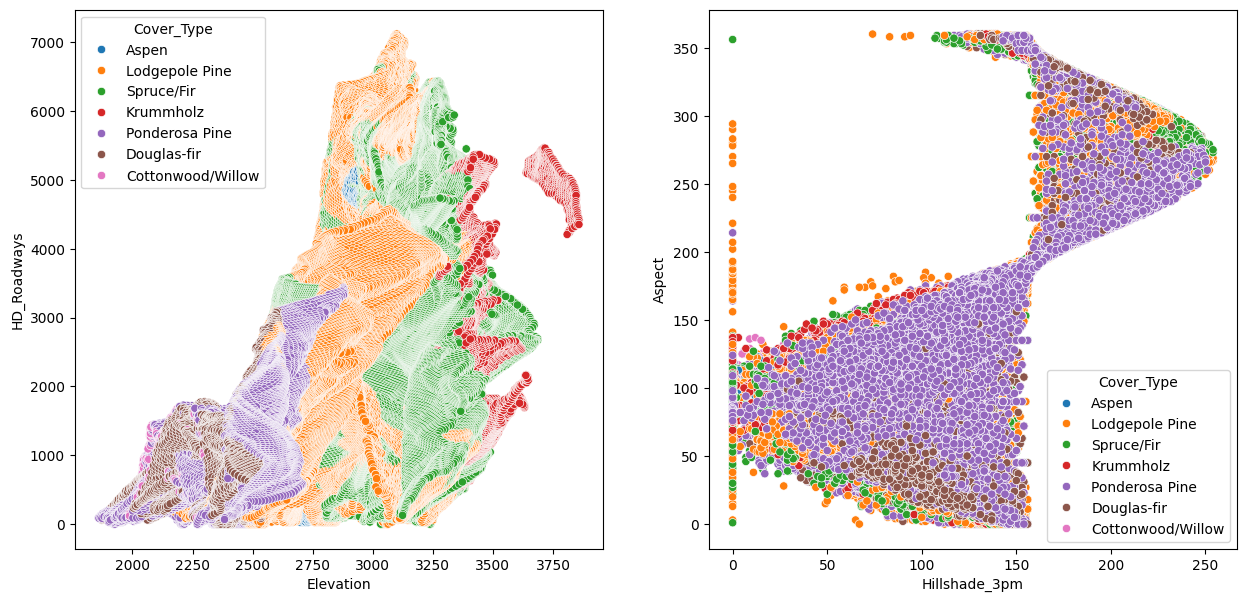

In [35]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.scatterplot(data=df,y='HD_Roadways',x='Elevation', hue='Cover_Type')
plt.subplot(122)
sns.scatterplot(data=df,y='Aspect',x='Hillshade_3pm', hue='Cover_Type')
plt.show()

#### Inference
- We can see a positive correlation between Elevation and Distance to Roadways.
- Cottonwood trees have the lowest Elevation and distance to roadways compared to other forest covers.
- Douglas trees grow on lower elevated areas but higher than compared to cottonwood trees.
- All Krummholz trees grow on higher elevated areas but we can see a variation in their distance to roadways value.

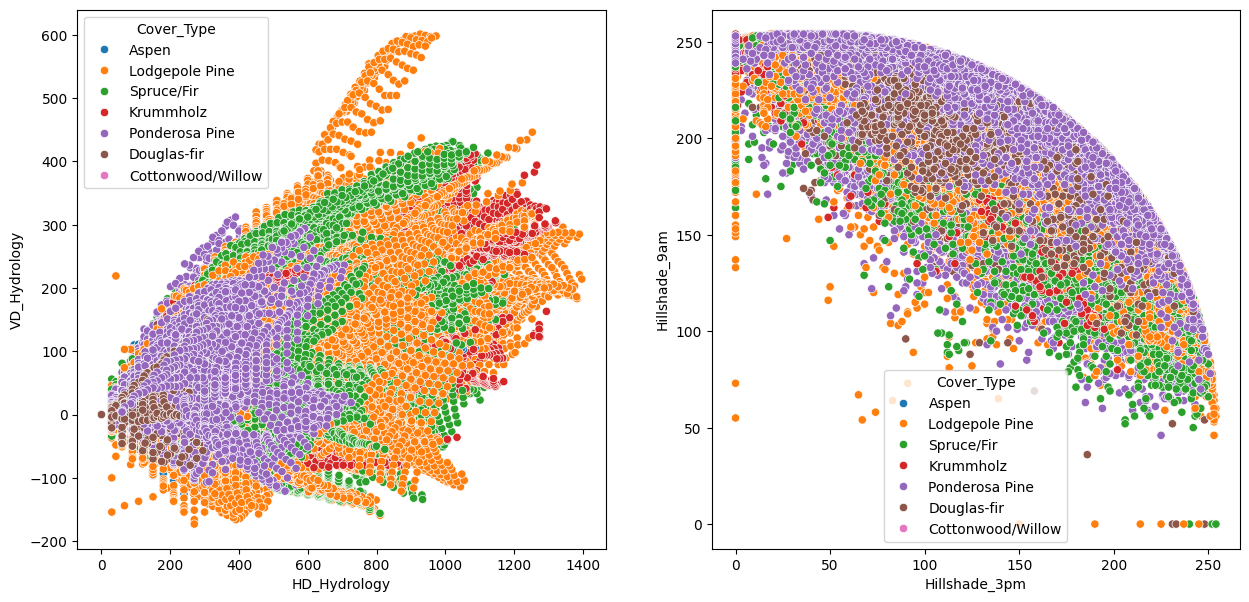

In [36]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.scatterplot(data=df,y='VD_Hydrology',x='HD_Hydrology', hue='Cover_Type')
plt.subplot(122)
sns.scatterplot(data=df,y='Hillshade_9am',x='Hillshade_3pm', hue='Cover_Type')
plt.show()

#### Inference 
- We can see positive correlation between both the distances to hydrology
- This graph is obvious as the shade at 9am will be opposite to the shade at 3pm on the area.
- We can see a negative correlation between hillshade index at 9am and 3pm

In [37]:
numeric_features

['Elevation',
 'Aspect',
 'Slope',
 'HD_Hydrology',
 'VD_Hydrology',
 'HD_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'HD_Fire_Points']

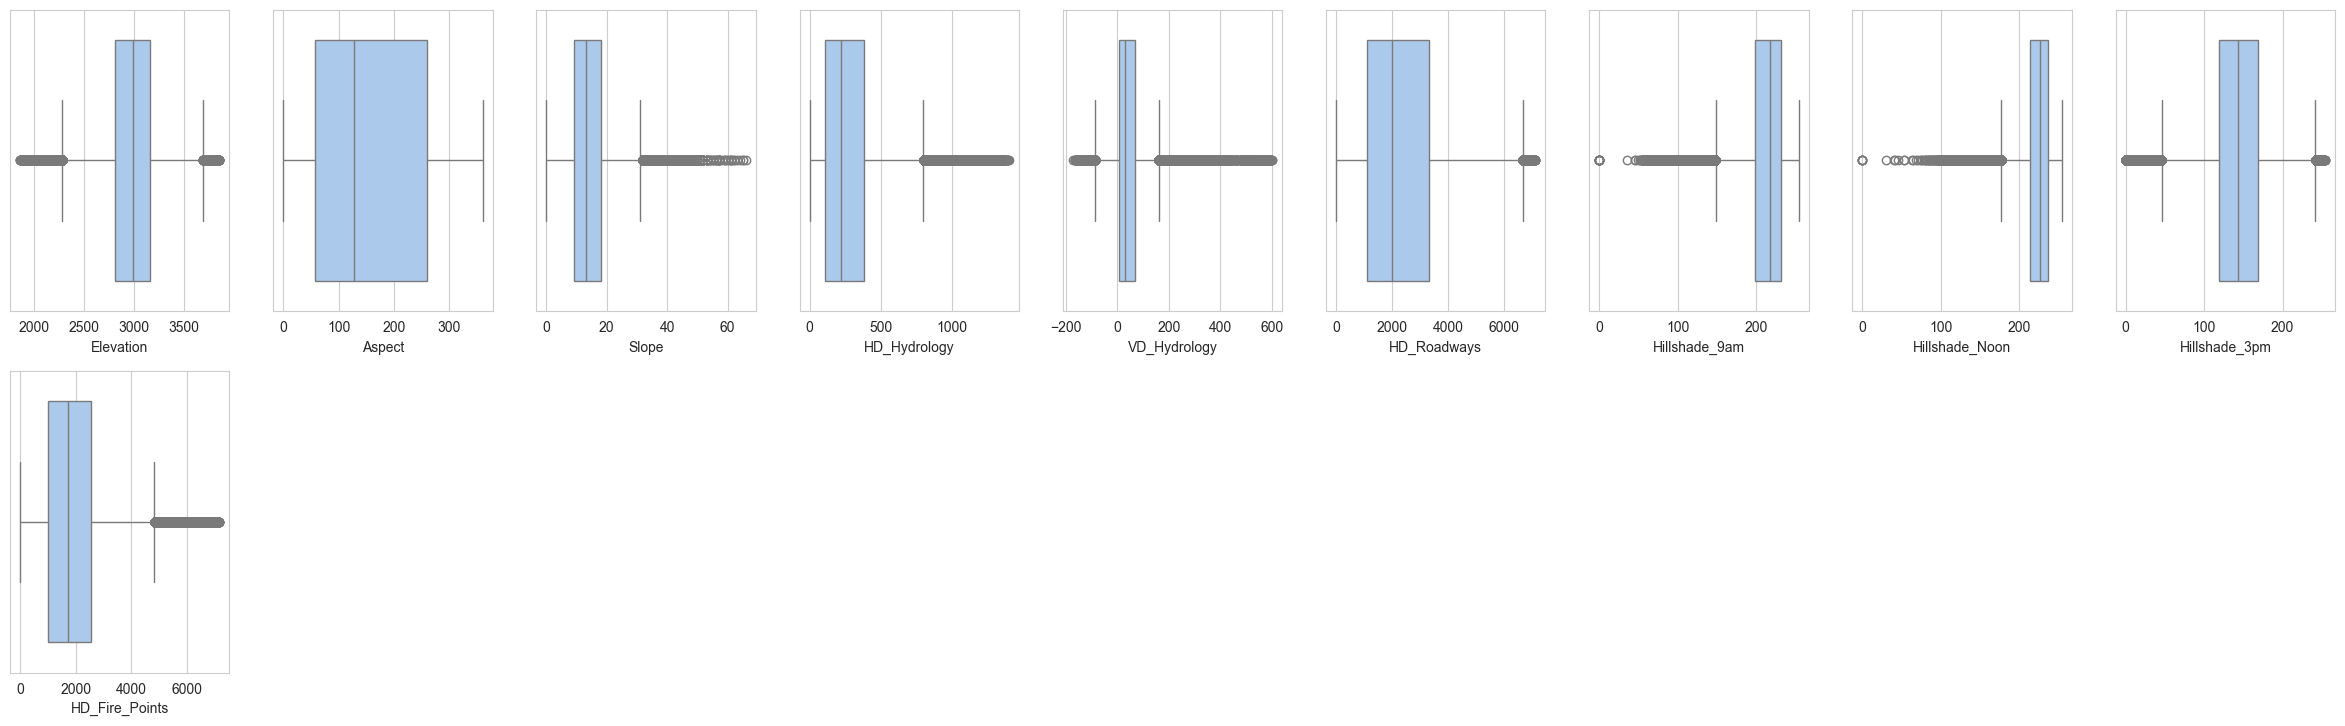

In [38]:
sns.set_style("whitegrid")
color = sns.color_palette('pastel')
plt.figure(figsize=(30,18))
for i,col in enumerate(numeric_features):
    plt.subplot(4,9,i+1)
    sns.boxplot(df[col], orient='h', palette=color)

#### Inference 
- Slope is the most squeezed box plot. It having a least range means that the median and mean will be quite close.
- Aspect features is the only one with little to none outliers.
- Elevation is the only feature that doesn't have a minimum value of 0. It is instead plotted in the middle having many outliers too.
- Horizontal_Distance_To_Roadways has the most spread out data of all features. This is because it has highest standard deviation score. Horizontal_Distance_To_Fire_Points has a similar look, but it has the maximum value.
- If we compare these two features, the last 50% of Horizontal_Distance_To_Roadways is much more spread and less dense compared to Horizontal_Distance_To_Fire_Points, hence having a high standard deviation score.

#### Vilon Plot
- Graphical representation of the distribution of a numeric variable.
- The violin plot shows the distribution of the data, including the shape of the distribution, the center of the data, the spread of the data and whether the data is symmetric or skewed.

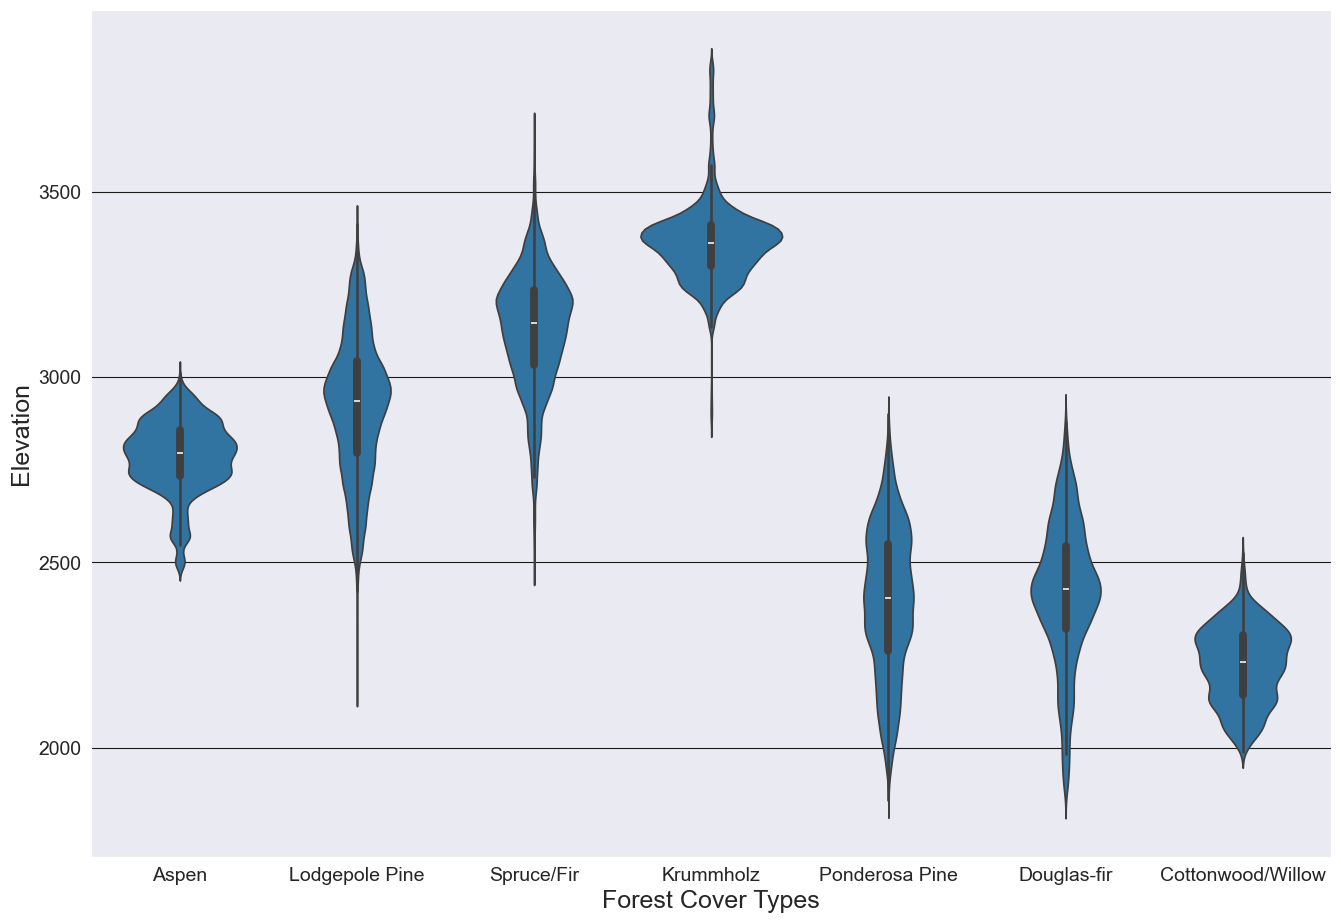

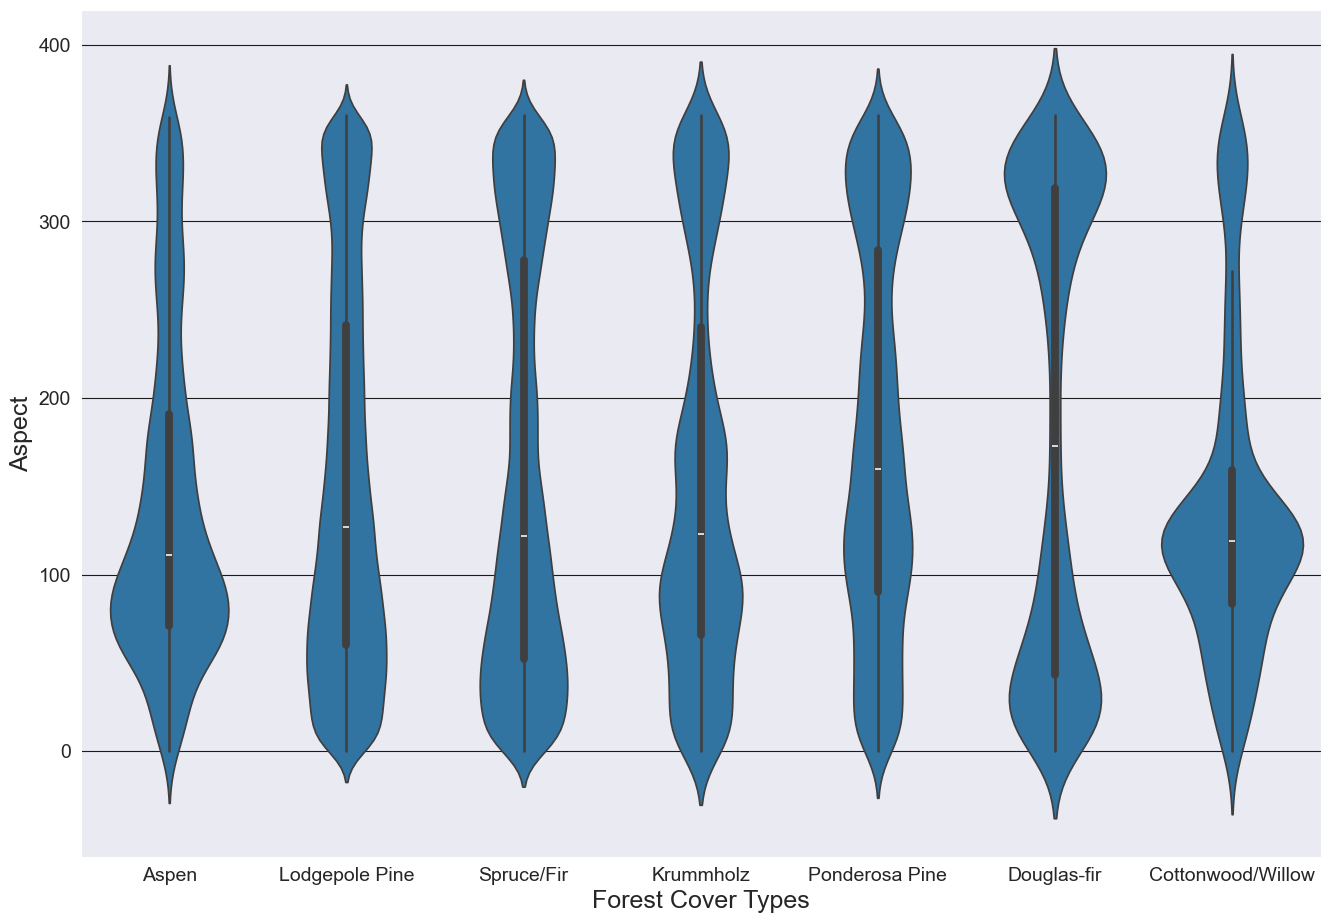

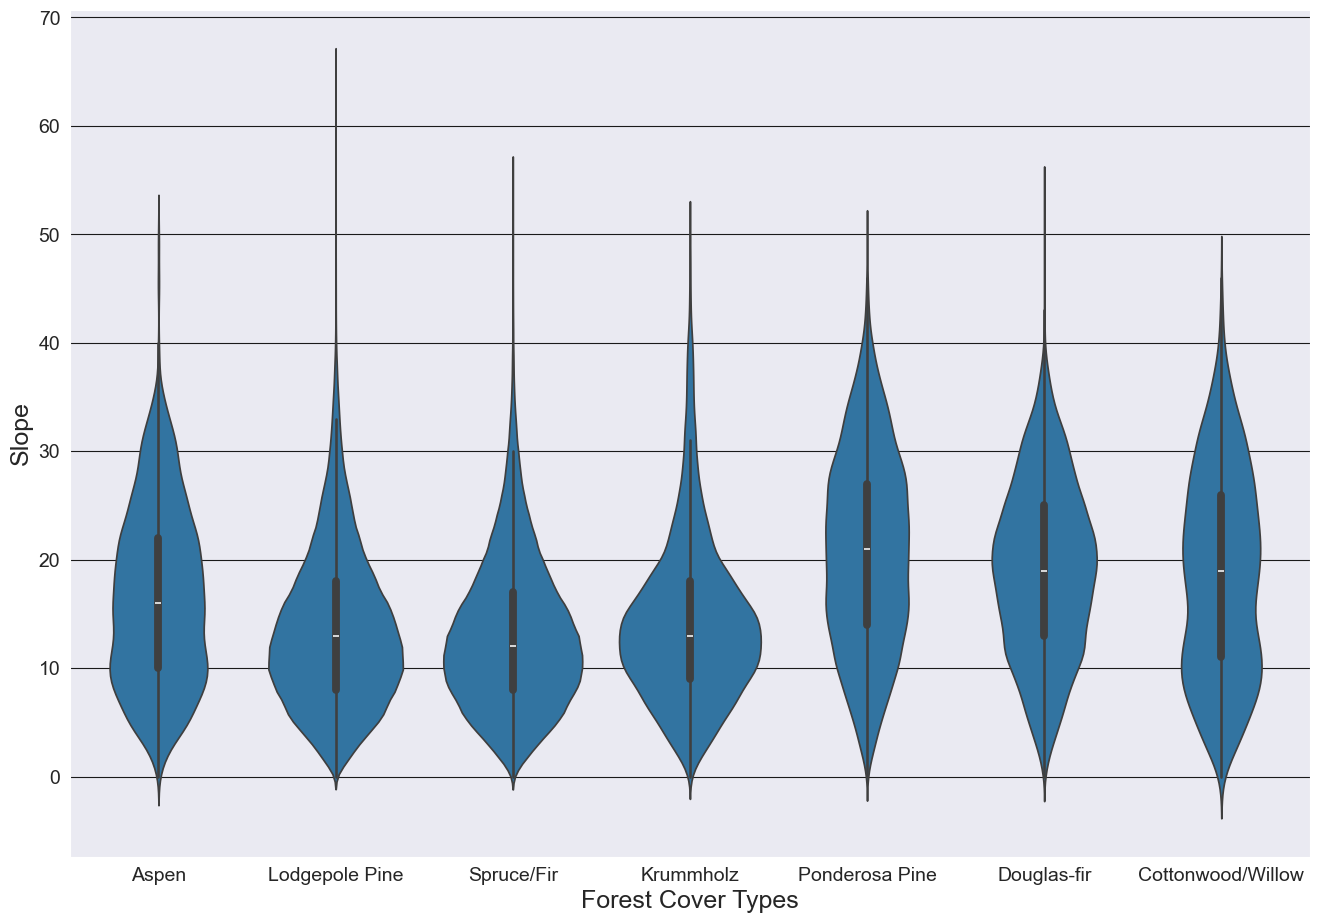

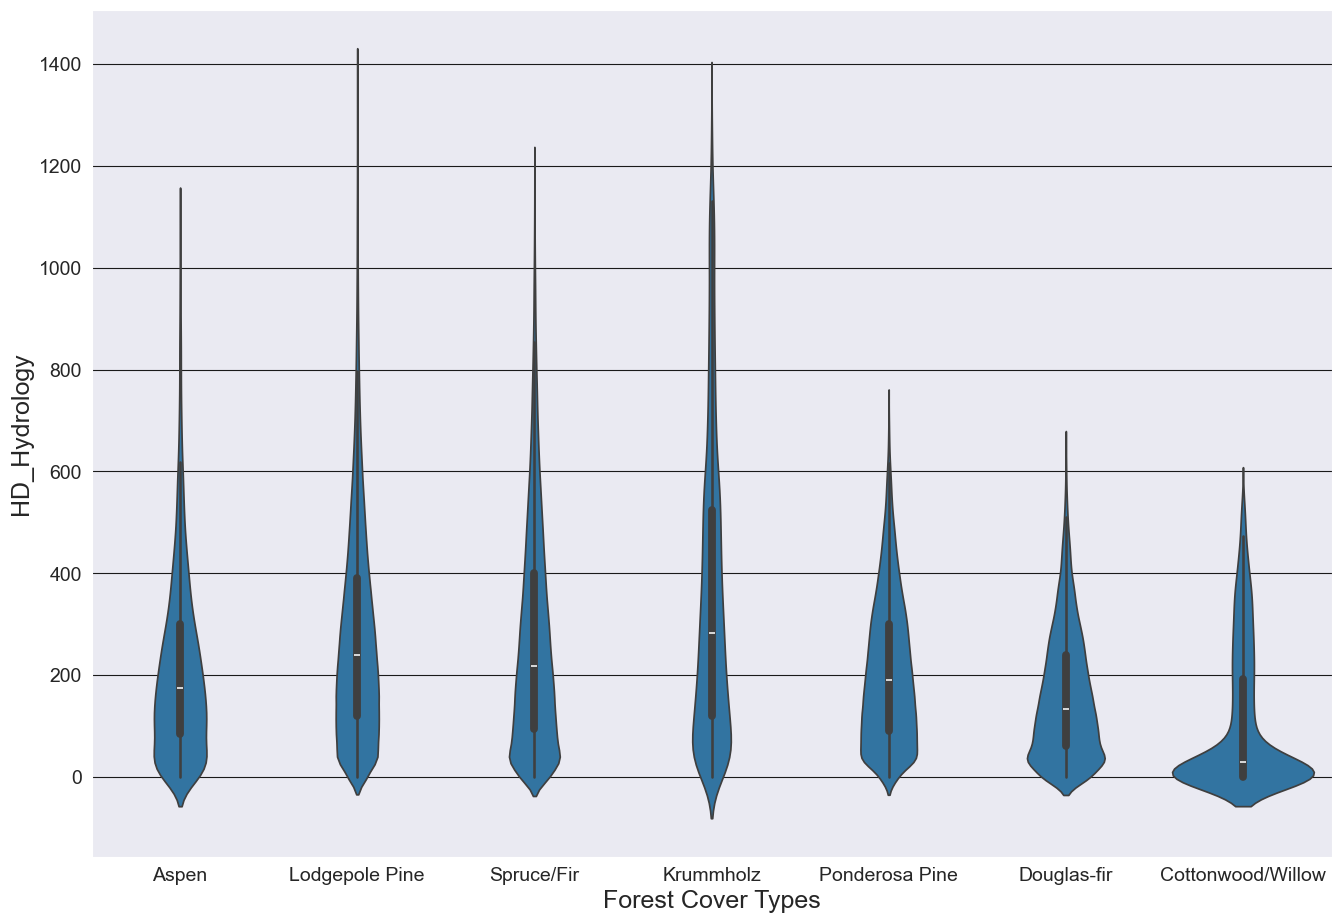

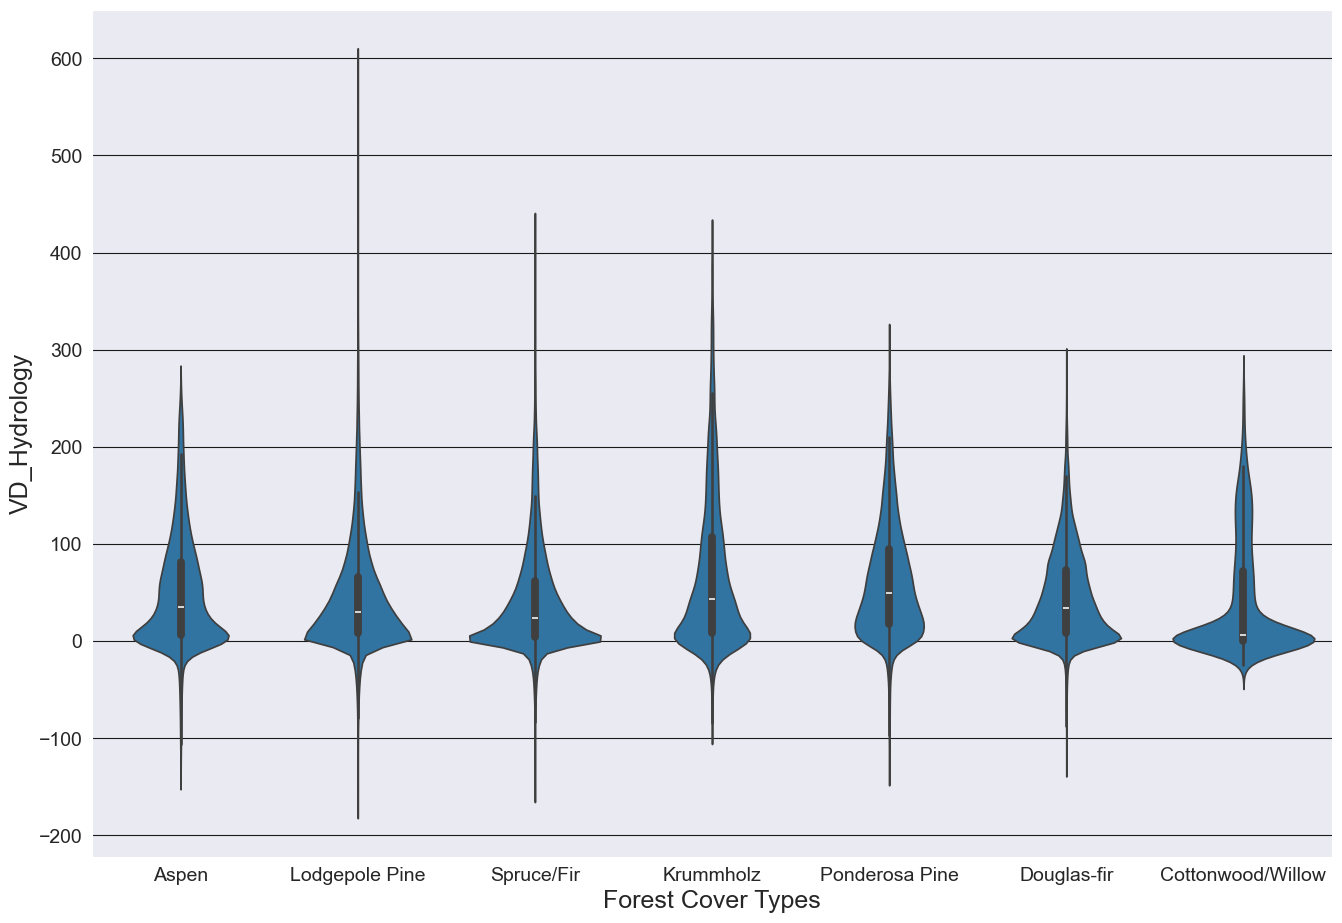

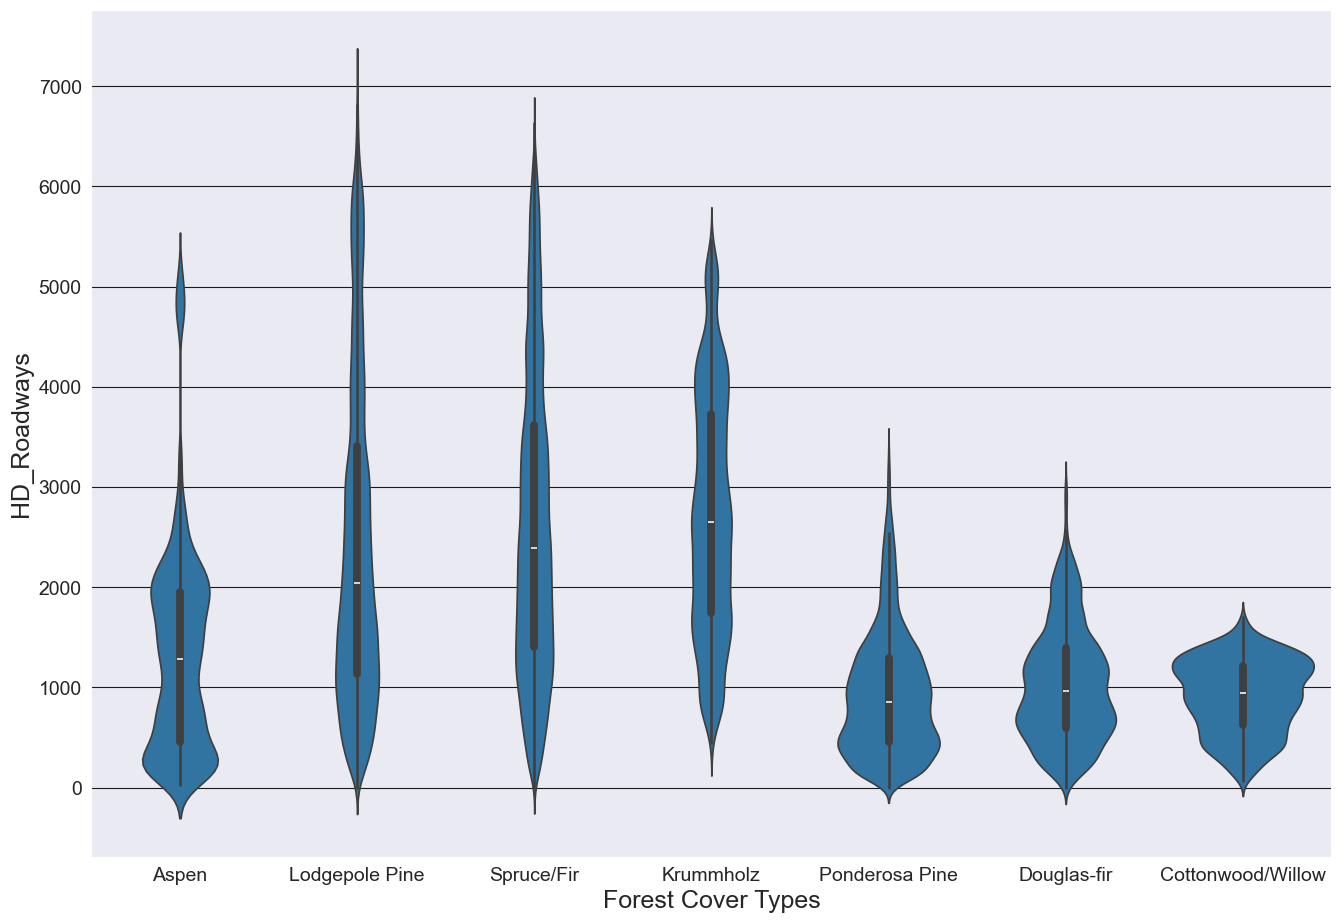

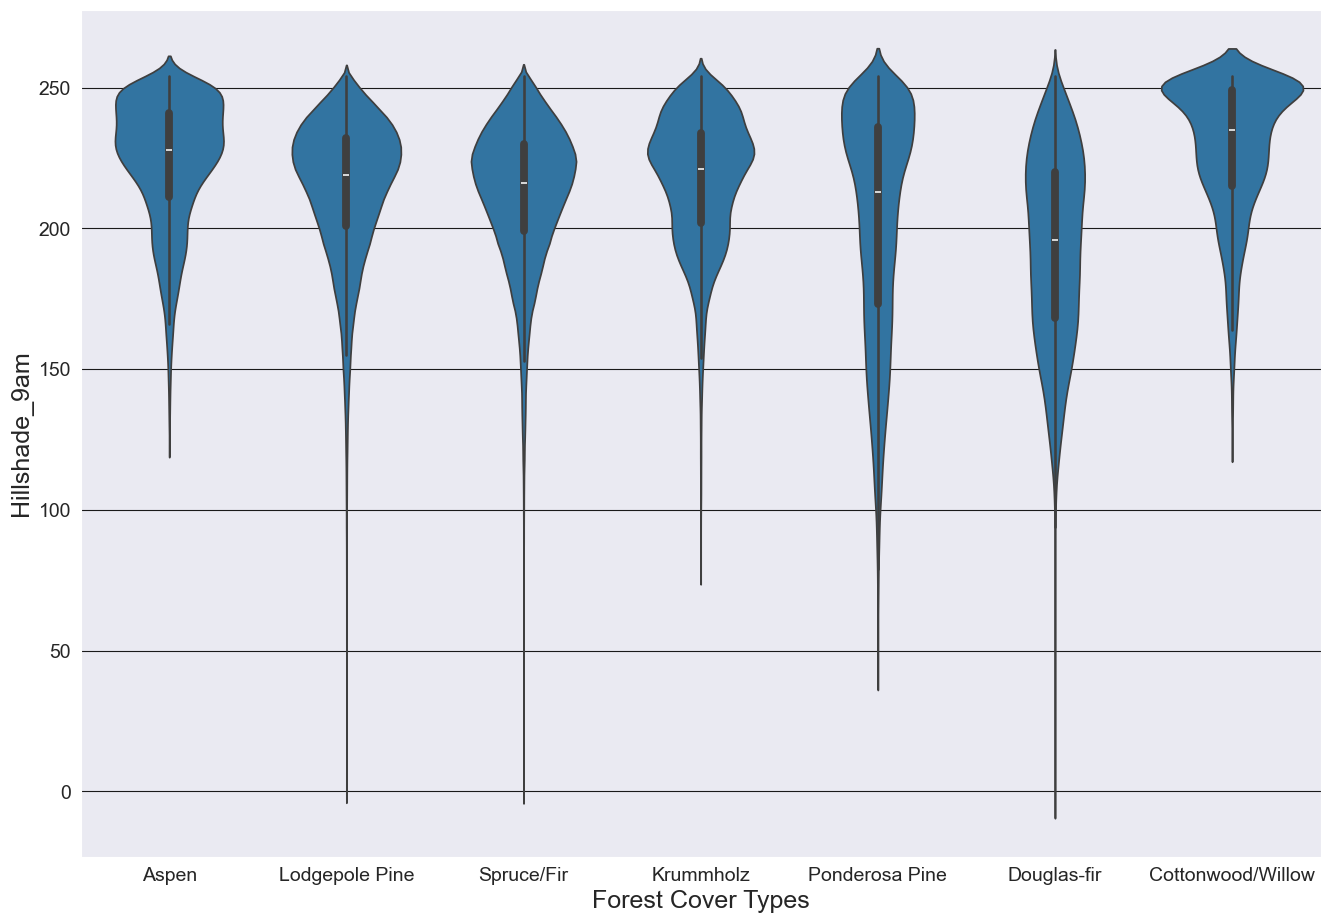

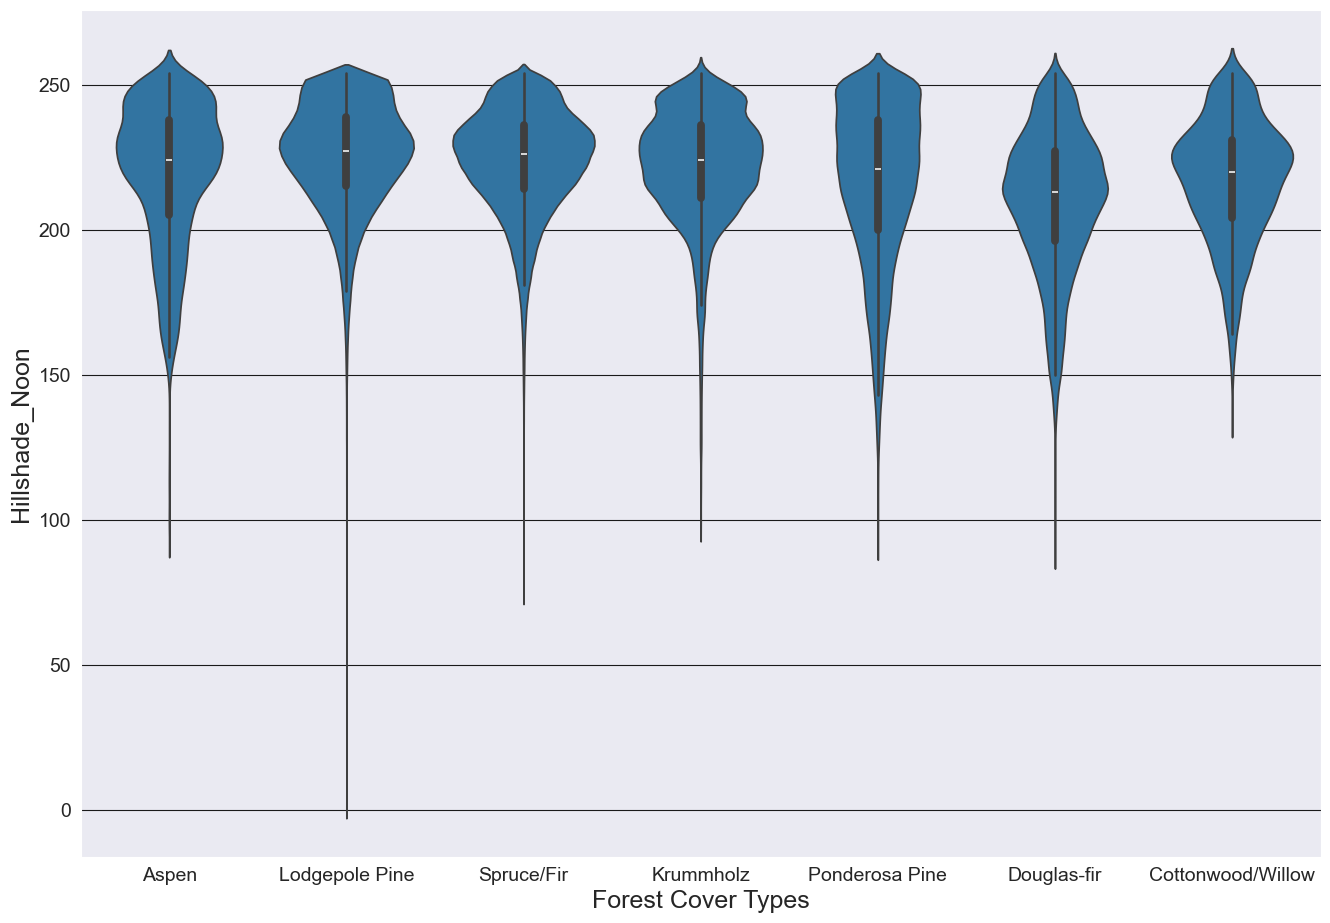

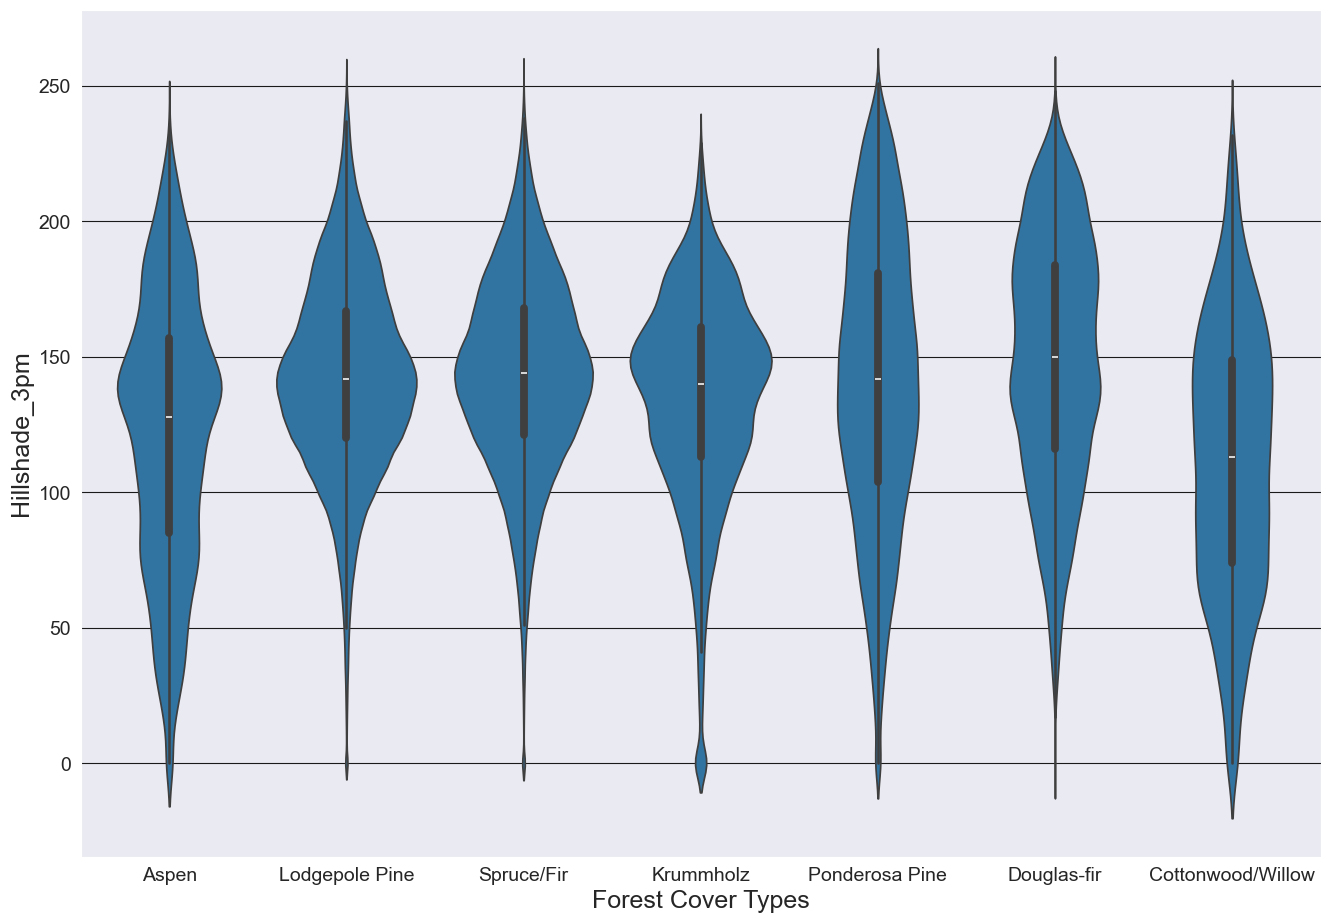

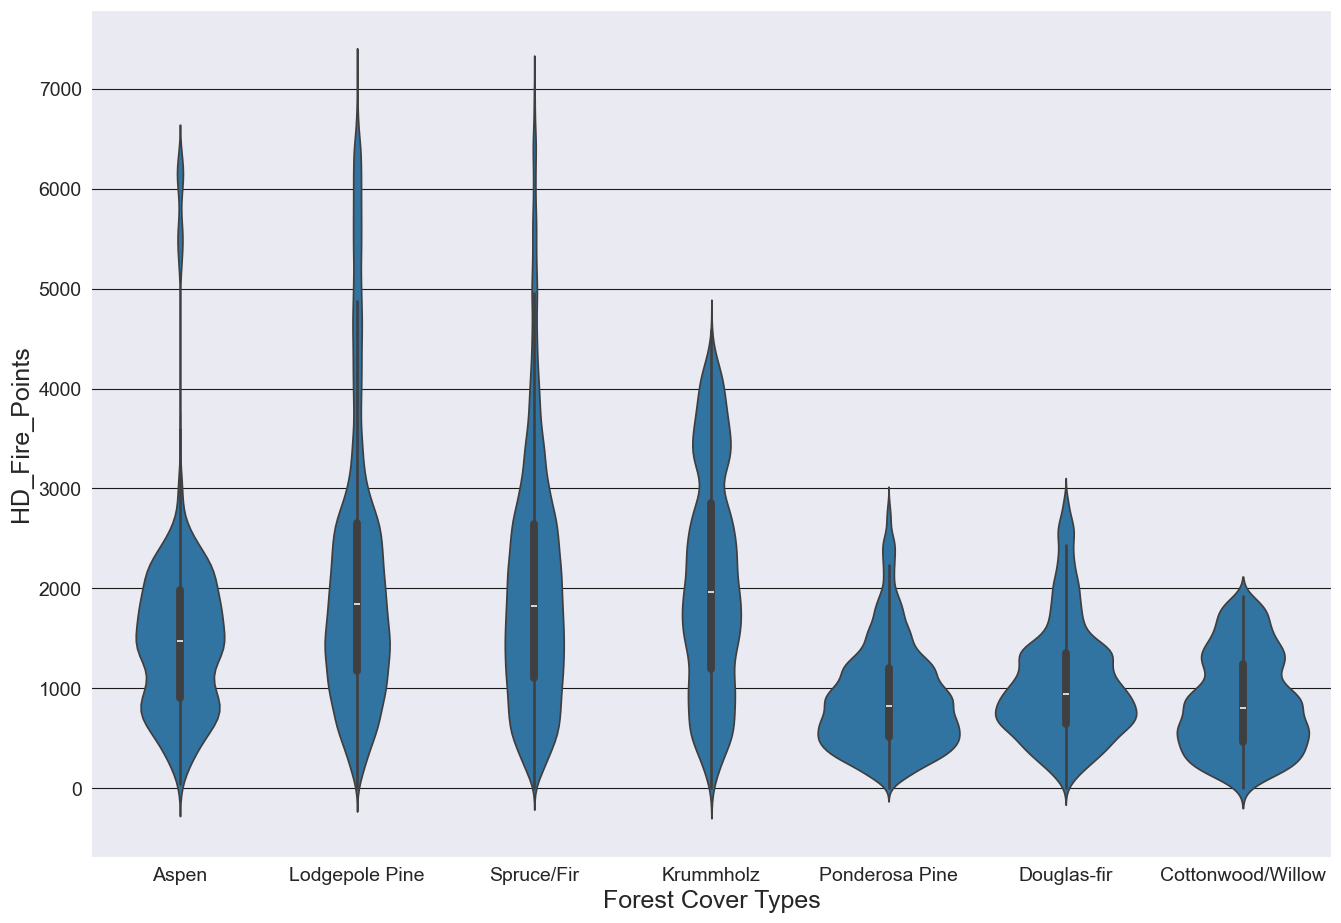

In [39]:
# extract all numerical features from train
num_features = df.iloc[:,:10]

# plot bg
sns.set_style("darkgrid", {'grid.color': '.1'})

# set target variable
target = df['Cover_Type']

# features to be compared with target variable
features = num_features.columns

# loop for violin plot
for i in range(0, len(features)):
    plt.subplots(figsize=(16,11))
    sns.violinplot(data=num_features, x=target, y=features[i])
    plt.xticks(size=14)
    plt.yticks(size=14)
    plt.xlabel('Forest Cover Types', size=18)
    plt.ylabel(features[i], size=18)
    plt.show()

#### Infernces
- Elevation
    - 'Cottonwood/Willow' has the most forest cover at elevation between 2000m - 2500m.
    - 'Krummholz' has observations of most elevated trees ranging as low as ~2800m to as high as ~3800m.
- Aspect
    -  This feature has a normal distribution for each class.
- Slope
    -  Slope has lower values compared to most features as its measured in degrees and least to Aspect which is also measured in degrees.
    -  It has the least maximum value of all features. Looking at the plot we can say that it belongs to Cover_Type2.
    -  All classes have dense slope observations between 0-20 degrees.
- Hillshade_9am and Hillshade_Noon are left or negatively skewed distribution where they take on max value between 200-250 index value for most observation in each class.

<Axes: xlabel='Hillshade_Noon', ylabel='Hillshade_3pm'>

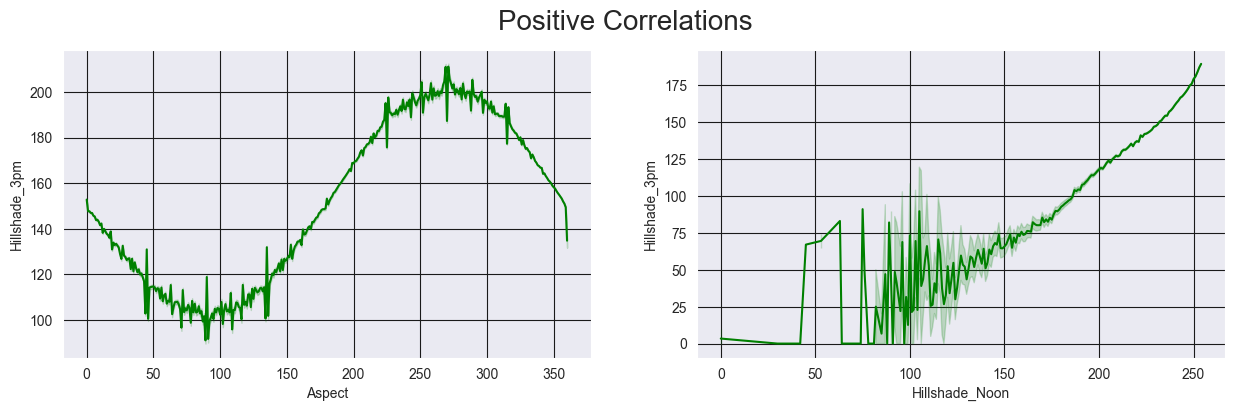

In [40]:
fig, axs = plt.subplots(ncols=2,figsize=(15,4))
fig.suptitle("Positive Correlations",fontsize='20')

sns.lineplot(x= "Aspect",y="Hillshade_3pm",data=df,color='green',ax=axs[0])
sns.lineplot(x= "Hillshade_Noon",y="Hillshade_3pm",data=df,color='green',ax=axs[1])

<Axes: xlabel='Hillshade_Noon', ylabel='Slope'>

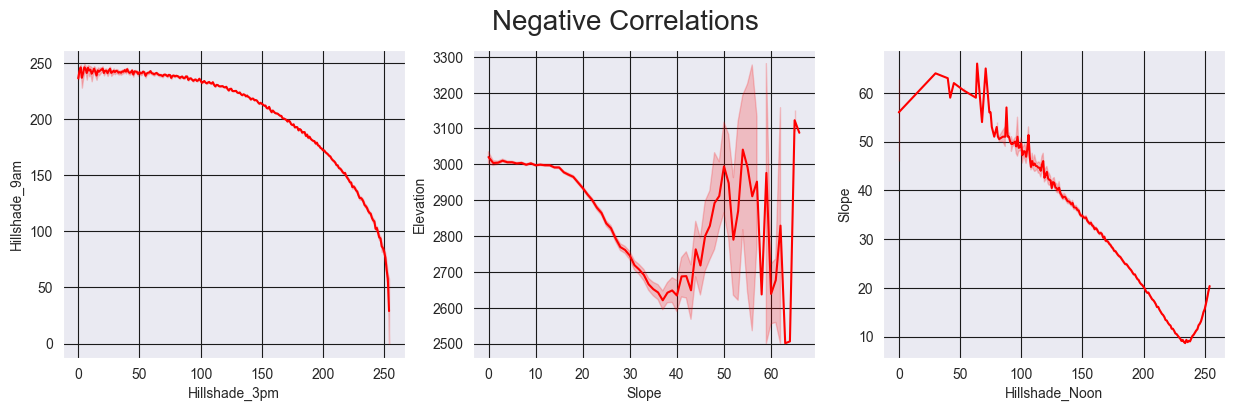

In [41]:
fig, axs = plt.subplots(ncols=3,figsize=(15,4))
fig.suptitle("Negative Correlations",fontsize='20')

sns.lineplot(x= "Hillshade_3pm",y="Hillshade_9am",data=df,color='red',ax=axs[0])
sns.lineplot(x= "Slope",y="Elevation",data=df,color='red',ax=axs[1])
sns.lineplot(x= "Hillshade_Noon",y="Slope",data=df,color='red',ax=axs[2])

#### Final Report
- Forest cover type 'Lodgepole Pine' has largest forest cover and 'Cottonwood/Willow' has lowest forest cover.
- Cache_La_Poudre and Neota Wilderness Areas have same number of forest covers.
- Most of the data is abundant with soil type 29 and 23.
- There is a positive correlation between Elevation and Distance to Roadways.
- There is a negative correlation between hillshade index at 9am and 3pm.
- Horizontal_Distance_To_Roadways has the most spread out data of all features.
- Cottonwood/Willow' has the most forest cover at elevation between 2000m - 2500m